# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



## Importamos pandas para utilizar el DataFrame

In [325]:
import pandas as pd
import matplotlib.pyplot as plt

## Importamos el Dataset con Pandas

In [326]:
df=pd.read_csv("datasets_calificaciones (1).csv")

# punto 2
## Iniciamos la exploracion del DataFrame

In [327]:
print("Primeros 5 datos")
print(df.head())

print("<-------------------------------------------------------------------------->")

print("ultimos 5 datos")
print(df.tail())
print("<-------------------------------------------------------------------------->")
print("Descripcion de los datos")
print(df.describe())
print("<-------------------------------------------------------------------------->")
print("informacion de datos")
print(df.info())

Primeros 5 datos
        estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
0        ana pérez  matematicas         8       7.5     9        95%
1     carlos lópez       fisica       6.2         7   NaN        88%
2      maría gómez      quimica         9       8.8   9.5       100%
3  pedro rodríguez     historia       7.5         6     7         75
4     laura vargas  matematicas                 9.2   8.5        92%
<-------------------------------------------------------------------------->
ultimos 5 datos
         estudiante      Materia Parcial 1 Parcial 2 Final Asistencia
95  josefina torres     historia       7.4       6.8   7.2        81%
96  bautista vargas  matematicas       8.7       NaN   8.5        92%
97        emma soto       fisica       6.6       7.0   6.4        83%
98       mateo díaz      quimica       9.5       9.7              98%
99  sofía fernández     historia       7.1       7.6   7.5        87%
<-------------------------------------------------------

## Ahora mostramos la cantidad de datos nulos (si es que los hay ).

In [328]:
df.isnull().sum()

estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64

### 3. Limpieza y Normalización de los Datos

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


## Convertimos los datos de las columnas parcial 1, 2 y Final a  int (enteros)

In [330]:
df["Parcial 1"]=pd.to_numeric(df["Parcial 1"], errors="coerce")

df["Parcial 2"]=pd.to_numeric(df["Parcial 2"], errors="coerce")

df["Final"]=pd.to_numeric(df["Final"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudiante  100 non-null    object 
 1   Materia     100 non-null    object 
 2   Parcial 1   88 non-null     float64
 3   Parcial 2   88 non-null     float64
 4   Final       85 non-null     float64
 5   Asistencia  100 non-null    object 
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


## Convertimos todos valores NaN con la media de cada uno de ellas.

In [331]:
df["Parcial 1"]=df["Parcial 1"].fillna(df["Parcial 1"].median())
df["Parcial 2"]=df["Parcial 2"].fillna(df["Parcial 2"].median())
df["Final"]=df["Final"].fillna(df["Final"].median())
df.head()



,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.0,7.5,9.0,95%
1,carlos lópez,fisica,6.2,7.0,7.8,88%
2,maría gómez,quimica,9.0,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6.0,7.0,75
4,laura vargas,matematicas,7.9,9.2,8.5,92%


### Verificamos si quedaron datos nulos

In [332]:
df.isnull().sum()

estudiante    0
Materia       0
Parcial 1     0
Parcial 2     0
Final         0
Asistencia    0
dtype: int64

## Cambiamos el nombre de la columna de "estudiantes" a "Estudiantes"

In [333]:
df=df.rename(columns={"estudiante":"Estudiantes"})


## Realizamos la capitalizacion.

In [334]:
df["Estudiantes"]=df["Estudiantes"].str.title()
df["Materia"]=df["Materia"].str.title()
df.head()


,Estudiantes,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95%
1,Carlos López,Fisica,6.2,7.0,7.8,88%
2,María Gómez,Quimica,9.0,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matematicas,7.9,9.2,8.5,92%


### Limitaremos los valores a 100 porque hay alumnos con mas del 100% de asistencia. 

In [335]:
df["Asistencia"]=df["Asistencia"].str.replace('%', '').astype(int).clip(lower=0, upper=100)
df.head()


,Estudiantes,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95
1,Carlos López,Fisica,6.2,7.0,7.8,88
2,María Gómez,Quimica,9.0,8.8,9.5,100
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matematicas,7.9,9.2,8.5,92


## 4. Obtención de Estadísticas Descriptivas
### Mostramos nuevamente los datos de DataFrame

In [336]:
print("Primeros 5 datos")
print(df.head())

print("<-------------------------------------------------------------------------->")

print("ultimos 5 datos")
print(df.tail())
print("<-------------------------------------------------------------------------->")
print("Descripcion de los datos")
print(df.describe().round(1))
print("<-------------------------------------------------------------------------->")
print("informacion de datos")
print(df.info())

Primeros 5 datos
       Estudiantes      Materia  Parcial 1  Parcial 2  Final  Asistencia
0        Ana Pérez  Matematicas        8.0        7.5    9.0          95
1     Carlos López       Fisica        6.2        7.0    7.8          88
2      María Gómez      Quimica        9.0        8.8    9.5         100
3  Pedro Rodríguez     Historia        7.5        6.0    7.0          75
4     Laura Vargas  Matematicas        7.9        9.2    8.5          92
<-------------------------------------------------------------------------->
ultimos 5 datos
        Estudiantes      Materia  Parcial 1  Parcial 2  Final  Asistencia
95  Josefina Torres     Historia        7.4        6.8    7.2          81
96  Bautista Vargas  Matematicas        8.7        7.7    8.5          92
97        Emma Soto       Fisica        6.6        7.0    6.4          83
98       Mateo Díaz      Quimica        9.5        9.7    7.8          98
99  Sofía Fernández     Historia        7.1        7.6    7.5          87
<-------

## 5. Visualización de los Datos con Matplotlib
En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.
Realizaremos grasficos para una mejor comprension.

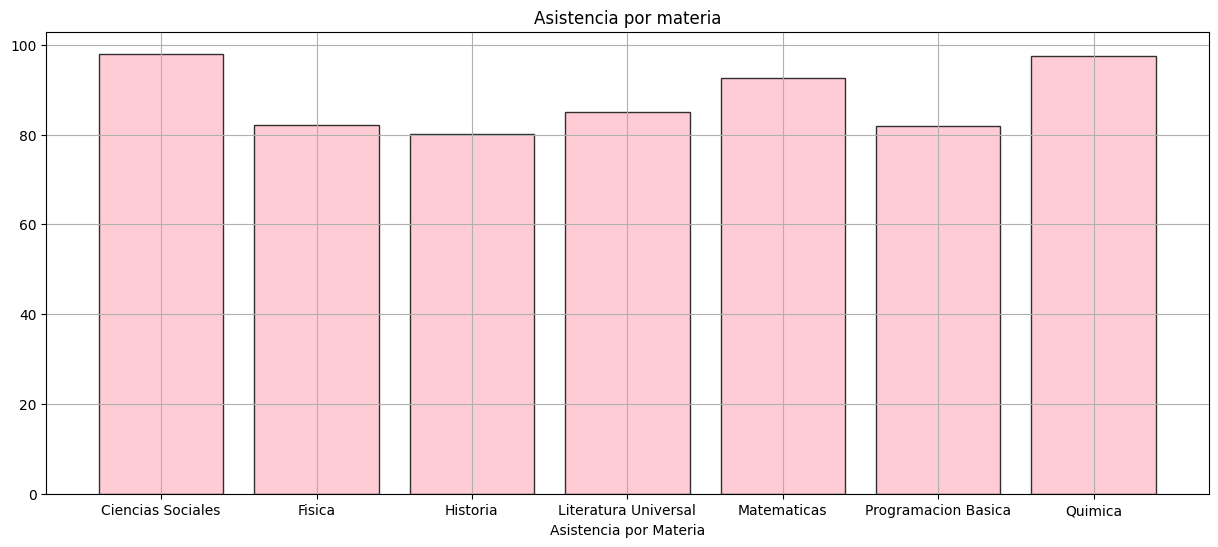

In [337]:
asistencia_por_materia = df.groupby("Materia")["Asistencia"].mean()

plt.figure(figsize=(15,6))
plt.title("Asistencia por materia")
plt.bar(asistencia_por_materia.index,asistencia_por_materia.values, color="pink" , alpha=0.8, edgecolor="black" )
plt.xlabel("Asistencia por Materia")
plt.grid()
plt.show()

## Grafico para entender mas facil el Promedio por notas


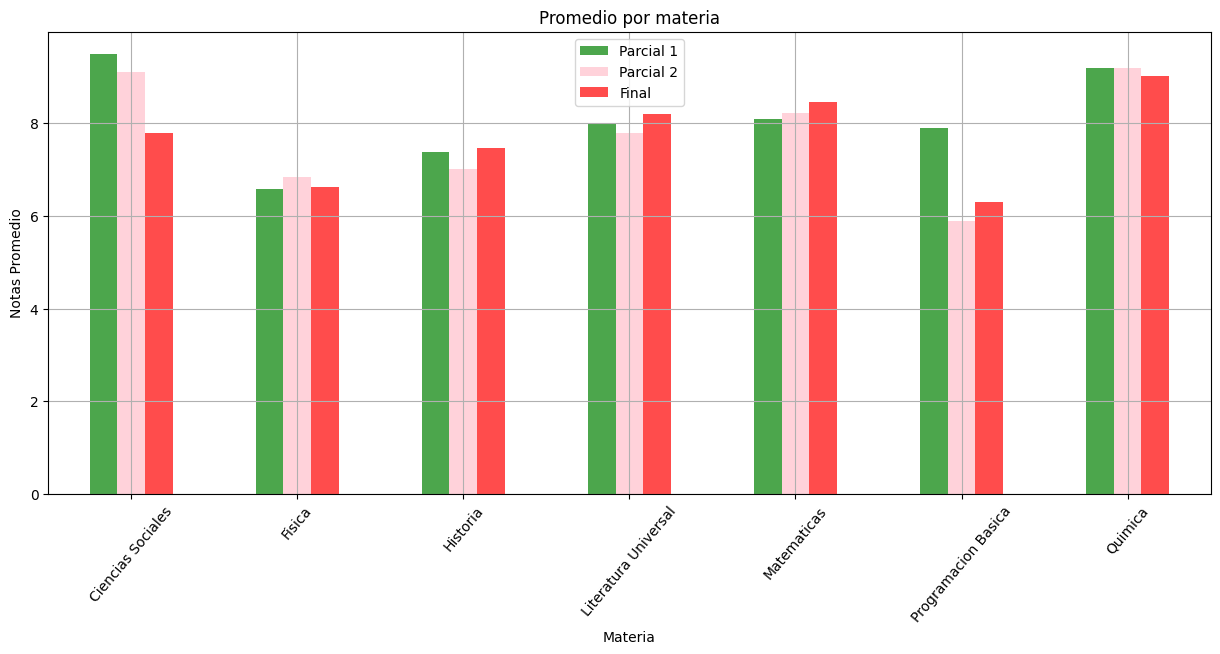

In [338]:
promedio_materia=df.groupby("Materia")[["Parcial 1", "Parcial 2", "Final"]].mean().round(2)
promedio_materia

promedio_materia.plot(kind="bar", color=["green", "pink", "red"], alpha=0.7,figsize=(15,6) )
plt.title("Promedio por materia")
plt.xlabel("Materia")
plt.ylabel("Notas Promedio")
plt.xticks(rotation=50)
plt.grid()
plt.show()


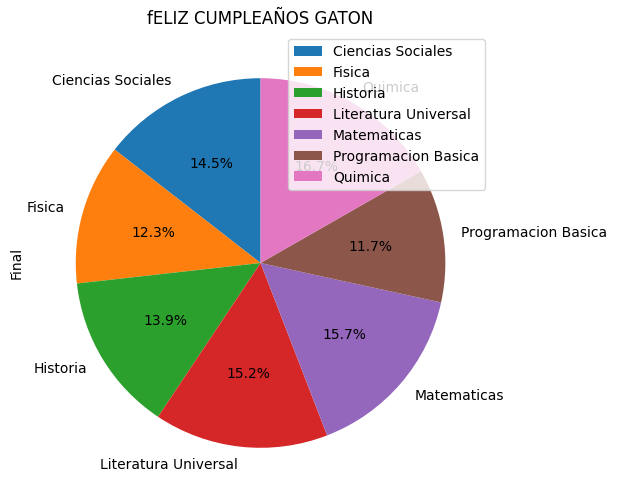

In [339]:
promedio_materia.plot(kind="pie", y="Final", autopct="%1.1f%%", figsize=(15,6), startangle=90)
plt.title("fELIZ CUMPLEAÑOS GATON")
plt.grid()
plt.show()

In [340]:
import sqlite3 

conn= sqlite3.connect("felizcumple_gaton.SQLite")
df.to_sql("felizcumple_gaton", conn, if_exists="replace", index=False)
conn.close()
